# Kernel Ridge Reression

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Data

In [4]:
#object function
def f(x):
    return 1*x**3 - 7*x**2 + 7*x + 1

In [5]:
np.random.seed(100) 

X = np.random.uniform(0, 5, 20)  # shape: (20,)
X_ = X.reshape(-1,1)            # shape: (20,1)


y = f(X.T) + np.random.normal(0, 0.5, X.shape[0])
y_ = y.reshape(-1,1)

test_X = np.linspace(-1, 6, 100)
test_X_ = test_X.reshape(-1,1)

print('X.shape','-->', 'X_.shape')
print(X.shape,'-->', X_.shape)
print('y.shape','-->', 'y_.shape')
print(y.shape,'-->', y_.shape)
print('\n')
print('test_X.shape --> test_X_.shape')
print(test_X.shape,'-->', test_X_.shape)

X.shape --> X_.shape
(20,) --> (20, 1)
y.shape --> y_.shape
(20,) --> (20, 1)


test_X.shape --> test_X_.shape
(100,) --> (100, 1)


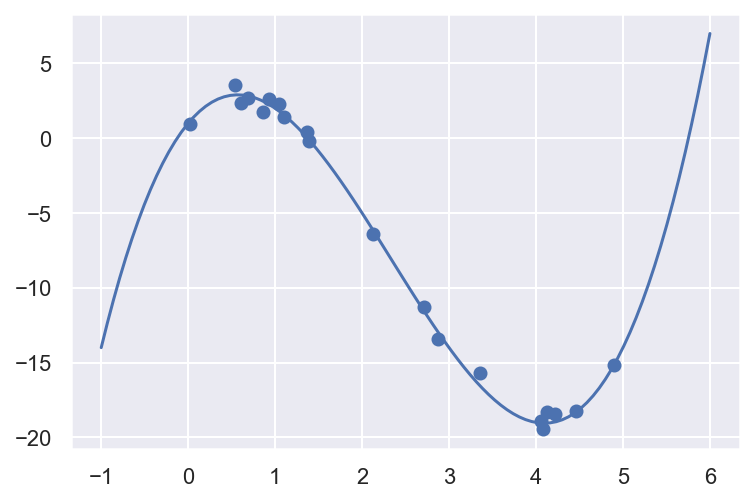

In [8]:
plt.figure()
plt.plot(test_X, f(test_X))
plt.scatter(X, y, marker="o")
plt.show()

## 2) Model

In [9]:
from sklearn.kernel_ridge import KernelRidge

#### Kernel Ridge Regression Algorithm
1. Compute Kernel Matrix K
2. Centering $ \alpha=(\lambda I + K)^{-1} y $
3. Kernel Matrix with Test data $K^* = k(X, x^*)$
4. Compute Prediction $y^* = \langle \alpha, k^* \rangle$

#### RBF Kernel
\\[ K(x, x') = \sigma_f * exp(-\frac{|| x - x' ||^2}{2*l^2} ) \\]

In [10]:
# Hyperparameter
# lambda : a를 만드는 I앞에 있는 lambda
# 원래 ridge에서 penalty term이랑 trade-off하던 C
lambda_ = 0.01

# lenght_scale :  수식에서 표준편차에 해당되는 부분
length_scale = 1

In [11]:
# hyper parameter
alpha = lambda_
gamma = 1/(2*length_scale**2)

Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.

Regarding, the tuning the parameters. I don't see any problem in your methodology. I'd use the grid search to find the C, gamma and epsilon values as well.

In [15]:
model = KernelRidge( alpha=alpha, kernel='rbf', gamma=gamma )
model.fit(X_, y_)  
y_plot = model.predict(test_X_) 

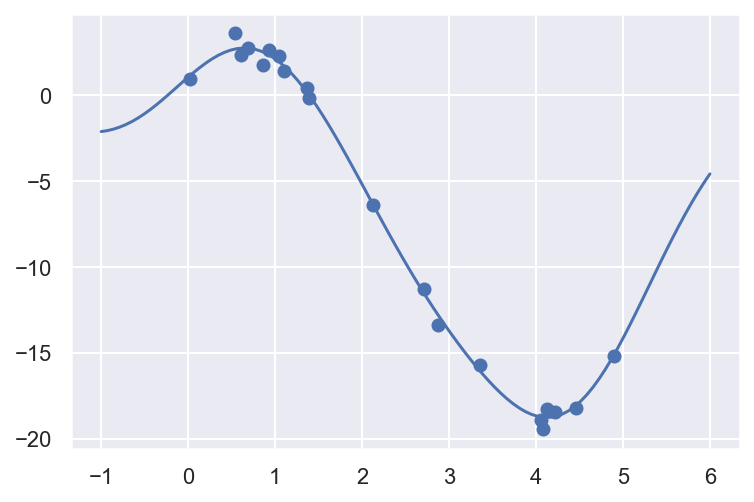

In [16]:
plt.figure()
plt.plot(test_X_, y_plot)
plt.scatter(X, y, marker='o')
plt.show()

## 3) Effect of hyperparameter

In [17]:
lambdas = [1e-2, 1, 1e+2]  #[0.01, 1, 100]
length_scales = [1e-1, 1., 1e+1] #[0.1, 1, 10]


fig, axs = plt.subplots( len(lambdas) , len(length_scales) , figsize=(12, 12), 
                        sharex=True, sharey=True)   # sharex : X축 공유, sharey: y축 공유
# fig는 전체 그래프, axs는 개별 그래프                                                                             


for i, lamb in enumerate(lambdas):
    for j, len_scale in enumerate(length_scales):
        alpha = lamb
        gamma = 1/(2*len_scale**2)
        
        model = KernelRidge(alpha = alpha, kernel='rbf', gamma=gamma)
        model.fit(X_, y_)
        y_plot = model.predict(test_X_)
        
        axs[i, j].plot(test_X, y_plot)
        axs[i, j].scatter(X, y, marker='o')
        axs[i, j].set_title(f'[lamb: {lamb}, len_scale: {len_scale}]')
        
        
axs[-1, 1].set_xlabel('length_scale')
axs[0, 0].set_ylabel('lambda')
fig.suptitle('(lambda, length_scale)', fontsize=16)
plt.close(fig)


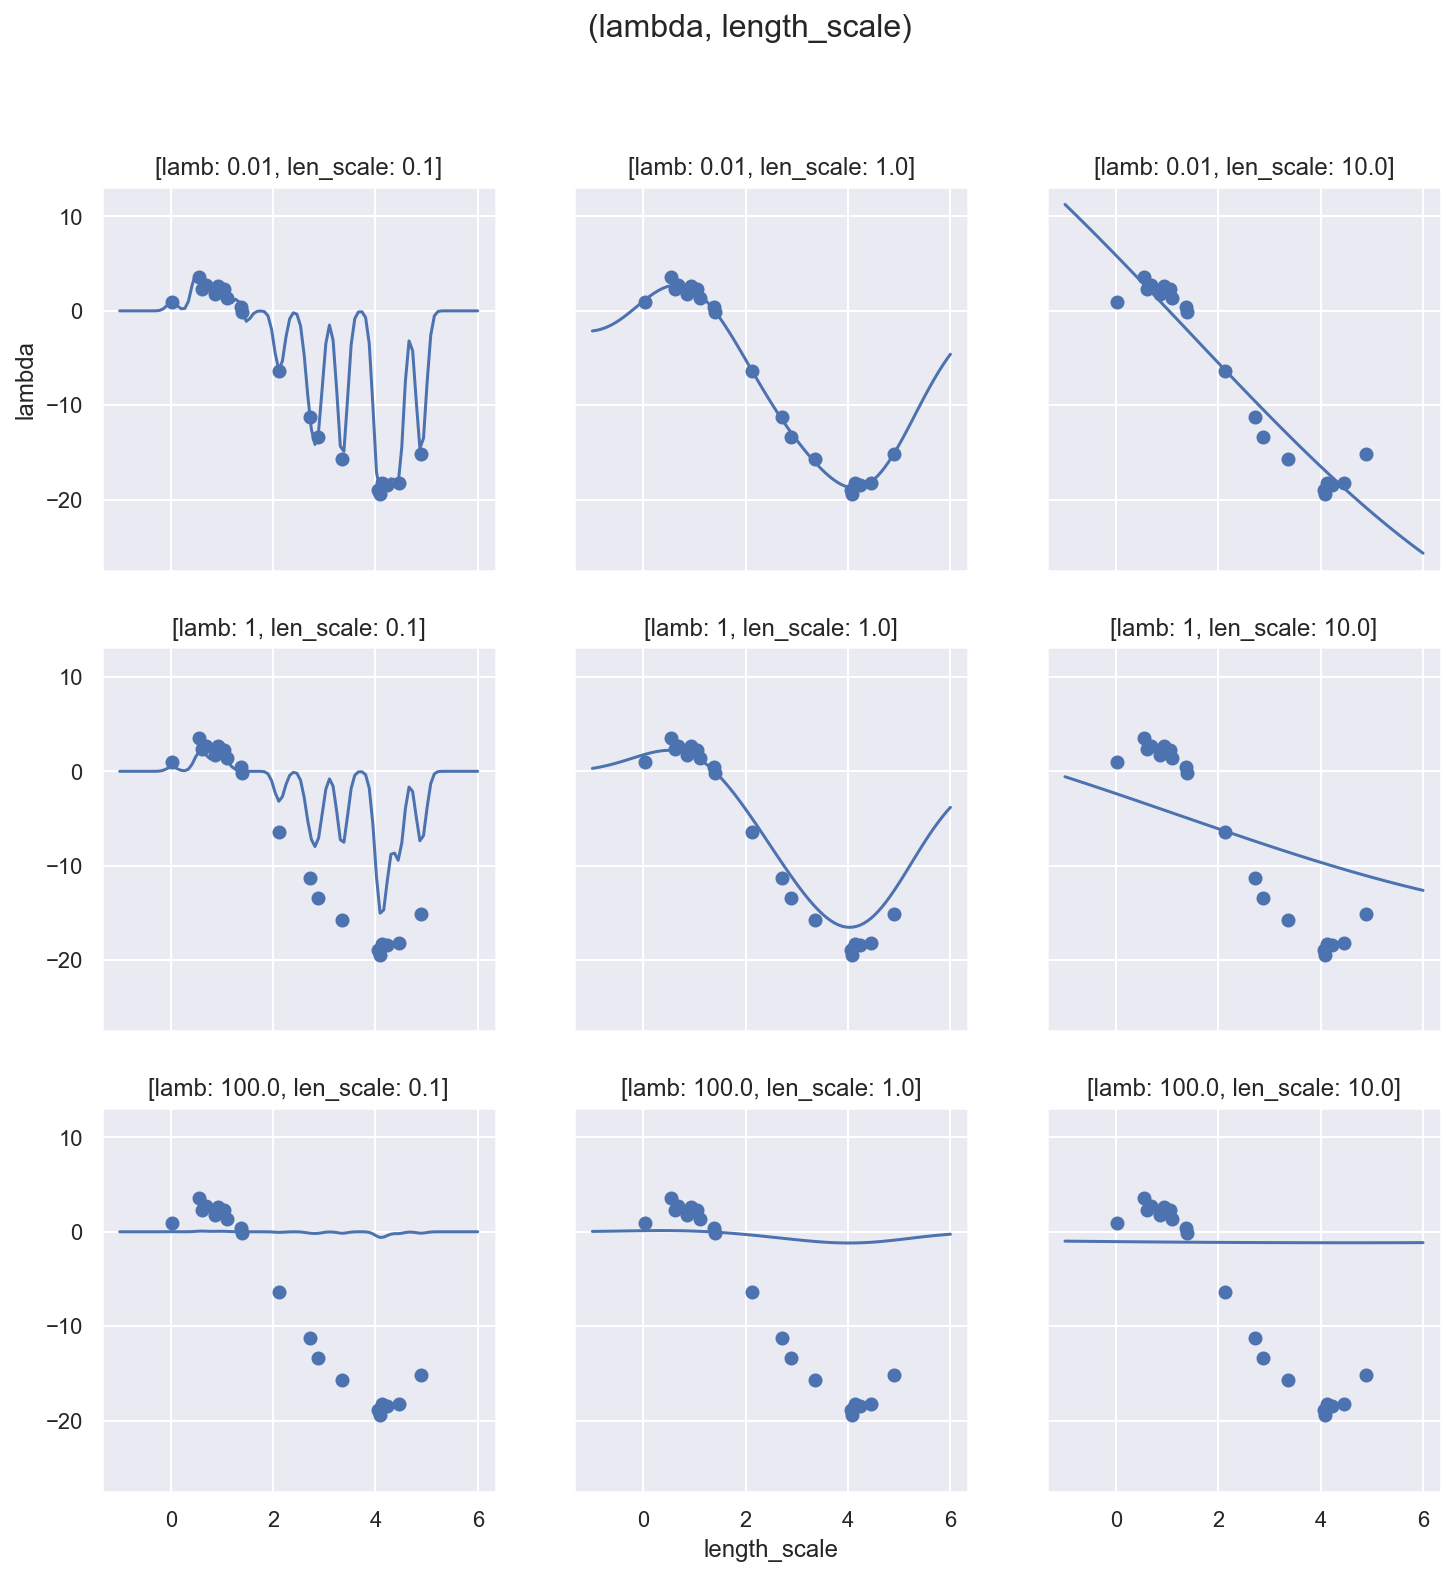

In [18]:
fig

- lenght_scale이 너무 작으면, overfitting, 너무 크면 underfitting가능성이 높다는 것을 알 수 있다. 
- labmda도 작으면, overfittin, 너무 크면 underfitting이 된다. 

## Linear model vs KRR

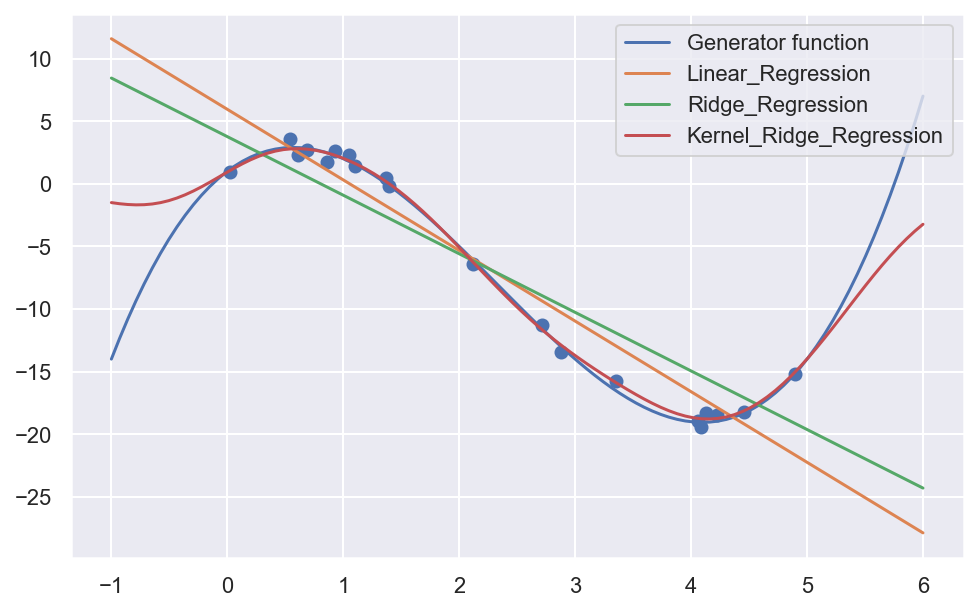

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


model = KernelRidge( alpha = 0.01, kernel = 'rbf', gamma=1.0 ).fit(X_, y_)
reg = LinearRegression().fit(X_,y_)
rid = Ridge(alpha=10).fit(X_,y_)

y_plot_model = model.predict(test_X_)
y_plot_reg = reg.predict(test_X_)
y_plot_rid = rid.predict(test_X_)

plt.figure(figsize=(8,5))
plt.plot(test_X,f(test_X),label='Generator function')
plt.plot(test_X,y_plot_reg,label='Linear_Regression')
plt.plot(test_X,y_plot_rid,label='Ridge_Regression')
plt.plot(test_X,y_plot_model,label='Kernel_Ridge_Regression')
plt.scatter(X, y, marker='o')
plt.legend(loc='upper right')
plt.show()